# WT Apo REST2 Simulation Analyses - 20 Replicas 

In [18]:
from __future__ import print_function, division
import os 
import json
import matplotlib.pyplot as plt
import math 
import numpy as np 
from numpy import ndarray
import seaborn as sns

In [19]:
plt.rc('lines', linewidth=1)
plt.rcParams["font.size"]
plt.rcParams.update({"font.size":12, 'ytick.labelsize': '12', 'xtick.labelsize': '12', 'legend.fontsize': '10', 'axes.titlesize': '12'})
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.set_style("whitegrid")

replica0,nrep=0,20
temp_xvg_file = "/Users/f006j60/Robustelli_Group/IAPP/wt/replica_temp.xvg"
indx_xvg_file = "/Users/f006j60/Robustelli_Group/IAPP/wt/replica_index.xvg"

data_dir='./wt_hiapp_apo_20rep_analyses/'
out_dir = data_dir
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
# hIAPP sequence 
sequence=  ['LYS1', 'CYS2', 'ASN3', 'THR4', 'ALA5', 'THR6', 'CYS7', 'ALA8', 'THR9', 'GLN10', 'ARG11', 'LEU12', 'ALA13', 'ASN14', 'PHE15', 'LEU16', 'VAL17', 'HIS18', 'SER19', 'SER20', 'ASN21', 'ASN22', 'PHE23', 'GLY24', 'ALA25', 'ILE26', 'LEU27', 'SER28', 'SER29', 'THR30', 'ASN31', 'VAL32', 'GLY33', 'SER34', 'ASN35', 'THR36', 'TYR37', 'NH238', 'LIG39']
temperature = [round(300 * math.exp(i * math.log(500/300) / 19), 2) for i in range(20)]

In [20]:
# decrease sequence length 
for n,i in enumerate(sequence): 
    if n%5 != 0: 
        sequence[n] = ""

In [21]:
# define some plotting functions 

def subplot_snsheat(data, ax=None, cbar=False, cbar_ax=None):
    if type(data) is ndarray:

        if ax is None:
            ax = plt.gca()

        plot = sns.heatmap(data, cmap='jet', vmin=0,vmax=0.5,ax=ax, cbar=cbar, cbar_ax=None if not cbar else cbar_ax)
        return plot

    else: pass
    
def subplot_imshow(data, xedges, yedges, ax=None):    
    if type(data) is ndarray:
        if ax is None:
            ax = plt.gca()
          
        im = ax.imshow(data, interpolation='gaussian', extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],
                        cmap='jet', aspect='auto', vmin =0.01, vmax=5.0)
        # cbar_ticks = [0, 1, 2, 3, 4, 5]
        # cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),aspect=10)
        
        return im
    
    else : pass

In [22]:
contact_map_p=json.load(open(data_dir+'p_contact_map.json','r'))

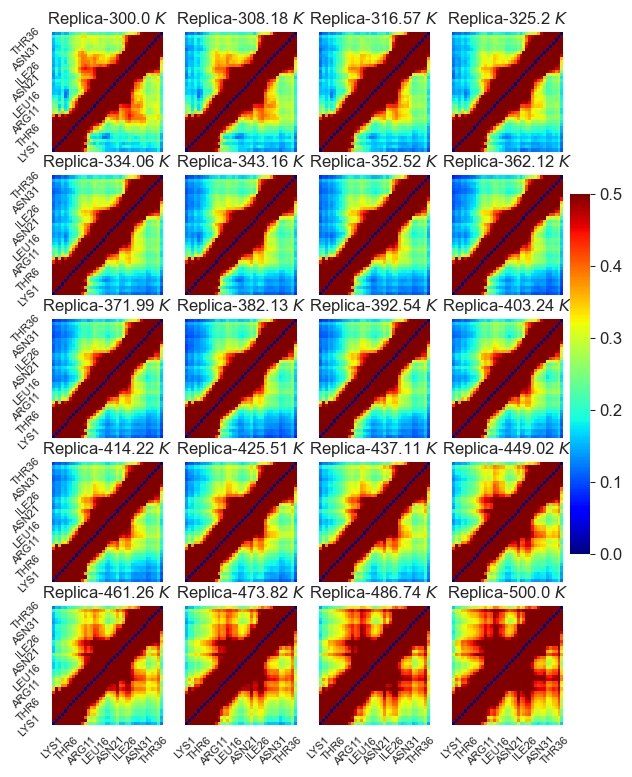

In [23]:
ncol = 4
nrow = int(nrep/ncol)
fig, ax = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(6.6, 9))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i in range(replica0,replica0+nrep):
    #contact_map = np.loadtxt(f"./Analysis/contact_map.{i}.dat")
    contact_map = np.array(contact_map_p['rep'])[i]
    p, q = np.unravel_index(i,(nrow,ncol))
    cb = i==1
    subplot_snsheat(contact_map, ax=ax[p,q], cbar=cb, cbar_ax=cbar_ax)
    ax[p,q].set_xticks(range(0, 39), sequence, rotation=45, size=8)
    ax[p,q].set_yticks(range(0, 39), sequence, rotation=45, size=8)
    ax[p,q].invert_yaxis()
    ax[p,q].set_title('Replica-'+str(temperature[i])+r' $K$')
    
plt.savefig(out_dir+'p_contact_maps_rep.png',dpi=310)

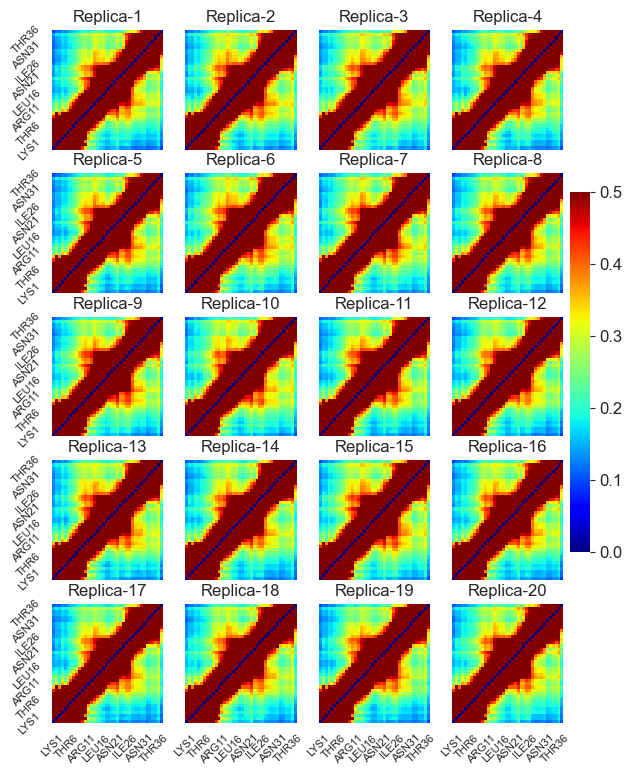

In [24]:
ncol = 4
nrow = int(nrep/ncol)
fig, ax = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(6.6, 9))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i in range(replica0,replica0+nrep):
    #contact_map = np.loadtxt(f"./Analysis/contact_map.{i}.dat")
    contact_map = np.array(contact_map_p['demux'])[i]
    p, q = np.unravel_index(i,(nrow,ncol))
    cb = i==1
    subplot_snsheat(contact_map, ax=ax[p,q], cbar=cb, cbar_ax=cbar_ax)
    ax[p,q].set_xticks(range(0, 39), sequence, rotation=45, size=8)
    ax[p,q].set_yticks(range(0, 39), sequence, rotation=45, size=8)
    ax[p,q].invert_yaxis()
    ax[p,q].set_title('Replica-'+str(i+1))
    
plt.savefig(out_dir+'p_contact_maps_demux.png',dpi=310)

In [25]:
ss=json.load(open(data_dir+'ss_fraction.json','r'))
sa=json.load(open(data_dir+'sa_timeseries.json','r'))
rg=json.load(open(data_dir+'rg_timeseries.json','r'))

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: float or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure` or `~matplotlib.figure.SubFigure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 

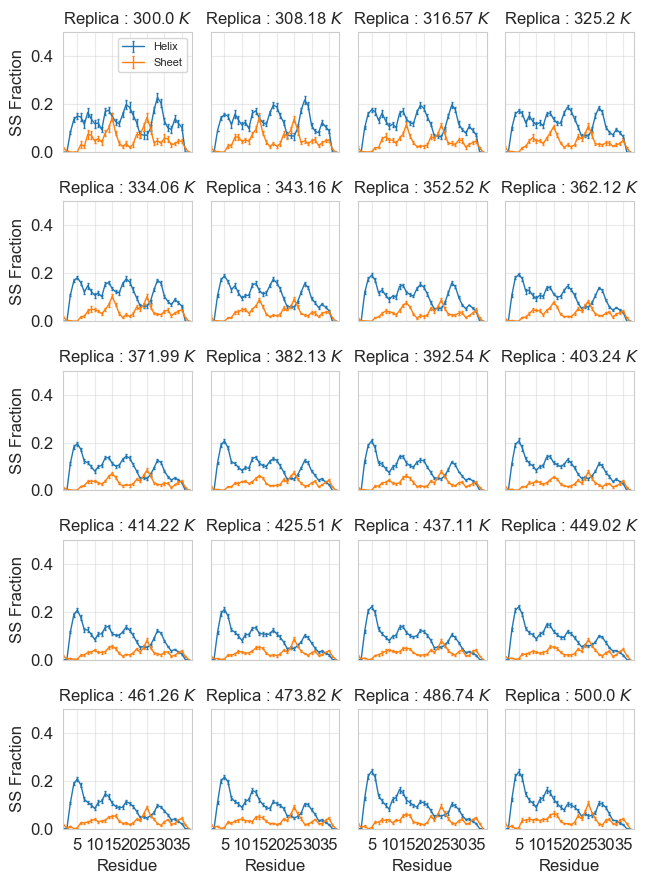

In [26]:
fig, ax = plt.subplots(5, 4, figsize=(6.6, 9), sharex=True, sharey=True)

for val in range(nrep):
    p, q = np.unravel_index(val,(5, 4))
    ax[p,q].errorbar(range(0, 38),np.array(ss['rep']['helix'])[val].T[0],
                     yerr=np.array(ss['rep']['helix'])[val].T[1], capsize=1,label='Helix',linewidth=1)
    ax[p,q].errorbar(range(0, 38),np.array(ss['rep']['sheet'])[val].T[0],
                     yerr=np.array(ss['rep']['sheet'])[val].T[1], capsize=1,label='Sheet',linewidth=1)
    
    ax[p,q].grid(alpha=0.4)
    plt.setp(ax[p,q].get_xticklabels())
    ax[p,q].set_ylim(0,0.5)
    ax[p,q].set_xticks(range(0,38,5))
    ax[p,q].set_xlim(1, 38)

    ax[p,q].set_title('Replica : '+str(temperature[val])+' $K$')
    
    if val == 0:
        ax[p,q].legend(loc=1,prop={'size': 8})
    
    if not q : ax[p,q].set_ylabel("SS Fraction")
    if p == 5-1 : ax[p,q].set_xlabel('Residue')
    
plt.tight_layout()
plt.savefig(out_dir+'ss_fraction_rep.png',dpi=210)

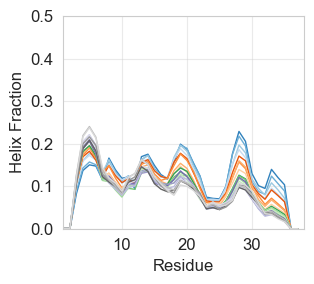

In [27]:
plt.figure(figsize=(3.3,3.0))

for val in range(20):
    plt.plot(range(0, 38),np.array(ss['rep']['helix'])[val].T[0],
             label='Replica '+str(temperature[val])+' K',linewidth=1,c=plt.cm.tab20c(val))
    # plt.errorbar(range(0, 38),np.array(ss['rep']['helix'])[val].T[0],yerr=np.array(ss['rep']['helix'])[val].T[1],
    #              capsize=5,label='Replica '+str(temperature[val])+' K',linewidth=1,c=plt.cm.tab20c(val))
plt.grid(alpha=0.4)
plt.ylim(0,0.5)
plt.xlim(1,38)
# plt.xticks(range(0,38,2),rotation=45)
# plt.title('Helical Propensities')
# plt.legend(ncols=2, loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.ylabel("Helix Fraction")
plt.xlabel('Residue')
    
#     text_=r'$K_{D}$'+' : '+str(round(np.array(bf_kd['rep'])[2][val],2))+r'$\pm$'+str(round(np.array(bf_kd['rep'])[3][val],2))
#     ax[p,q].text(120.3, 0.63, text_, fontsize = 28)
    
plt.tight_layout()
plt.savefig(out_dir+'ss_fraction_helix_rep.pdf',dpi=300)

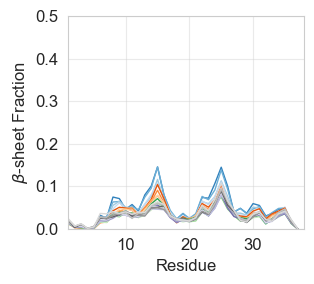

In [28]:
plt.figure(figsize=(3.3,3))

for val in range(20):
    plt.plot(range(0,38),np.array(ss['rep']['sheet'])[val].T[0],
             label='Replica '+str(temperature[val])+' K',linewidth=1,c=plt.cm.tab20c(val))
    # plt.errorbar(range(0,38),np.array(ss['rep']['sheet'])[val].T[0],yerr=np.array(ss['rep']['sheet'])[val].T[1],
    #              capsize=5,label='Replica '+str(temperature[val])+' K',linewidth=1,c=plt.cm.tab20c(val))
    
plt.tick_params()
plt.grid(alpha=0.4)
plt.ylim(0,0.5)
plt.xlim(1,38)
# plt.xticks(range(0,38,2),rotation=45)
# plt.title('Beta-sheet Propensities')
plt.ylabel("$\\beta$-sheet Fraction")
plt.xlabel('Residue')
    
plt.tight_layout()
plt.savefig(out_dir+'ss_fraction_sheet_rep.pdf',dpi=300)

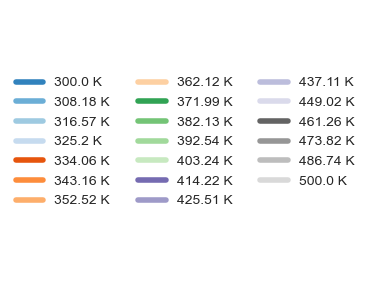

In [29]:
# Create a standalone legend figure
legend_fig = plt.figure(figsize=(3.3,3))
legend_ax = legend_fig.add_subplot(111)
legend_handles = []

# Generate legend items based on colormap
for i in range(20):
    label = str(temperature[i])+' K'
    color = plt.cm.tab20c(i)
    legend_handles.append(plt.Line2D([0], [0], color=color, lw=4, label=label))

# Add the legend
legend_ax.legend(handles=legend_handles, loc="center", frameon=False, ncols=3, fontsize=10)
legend_ax.axis("off")  # Turn off axes for cleaner look
legend_fig.tight_layout()
plt.savefig(out_dir+'ss_fraction_rep_legend.pdf',dpi=300, bbox_inches="tight")

(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)


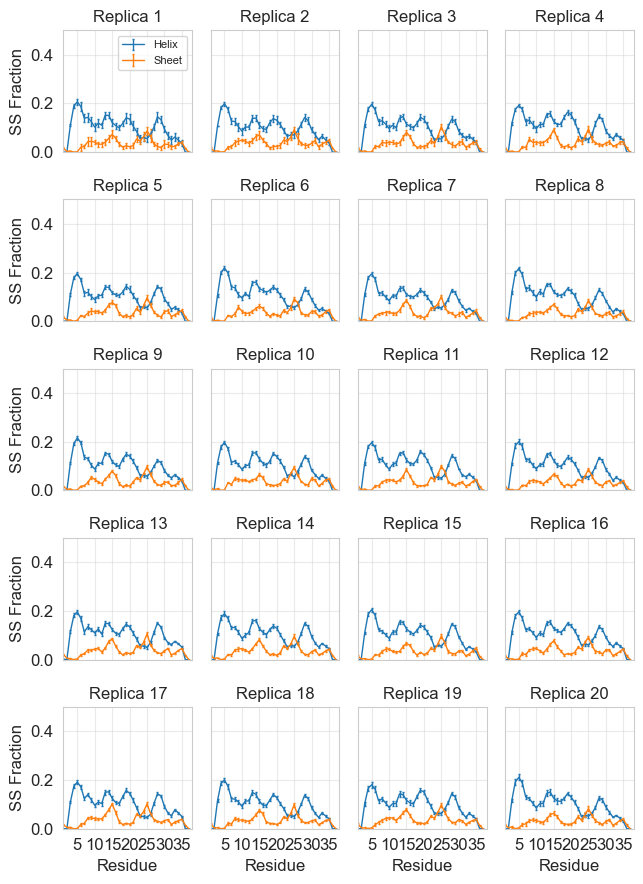

In [30]:
fig, ax = plt.subplots(5, 4, figsize=(6.6, 9), sharex=True, sharey=True)

for val in range(20):
    p, q = np.unravel_index(val,(5, 4))

    print(np.array(ss['demux']['helix'])[val].T[0].shape, np.array(ss['rep']['helix'])[val].T[1].shape)
    
    ax[p,q].errorbar(range(0,38),np.array(ss['demux']['helix'])[val].T[0],
                     yerr=np.array(ss['rep']['helix'])[val].T[1], capsize=1,label='Helix',linewidth=1)
    ax[p,q].errorbar(range(0,38),np.array(ss['demux']['sheet'])[val].T[0],
                     yerr=np.array(ss['rep']['sheet'])[val].T[1], capsize=1,label='Sheet',linewidth=1)
    
    ax[p,q].tick_params()
    ax[p,q].grid(alpha=0.4)
    ax[p,q].set_ylim(0,0.5)
    ax[p,q].set_xticks(range(0,38,5))
    ax[p,q].set_xlim(1, 38)
    ax[p,q].set_title('Replica '+str(val+1))
    
    if val == 0:
        ax[p,q].legend(loc=1,prop={'size': 8})
    
    if not q : ax[p,q].set_ylabel("SS Fraction")
    if p == 5-1 : ax[p,q].set_xlabel('Residue')
        
plt.tight_layout()

plt.savefig(out_dir+'ss_fraction_demux.png',dpi=210)

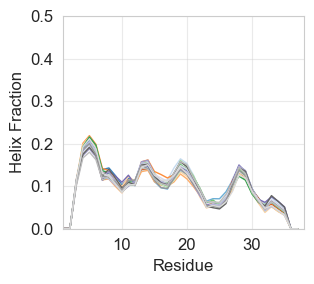

In [31]:
plt.figure(figsize=(3.3,3.0))

for val in range(20):
    plt.plot(range(0, 38),np.array(ss['demux']['helix'])[val].T[0],
                 label='Replica '+ str(val + 1),linewidth=1,c=plt.cm.tab20c(val))    
    # plt.errorbar(range(0, 38),np.array(ss['demux']['helix'])[val].T[0],yerr=np.array(ss['demux']['helix'])[val].T[1],
    #              capsize=5,label='Replica '+ str(val + 1),linewidth=1,c=plt.cm.tab20c(val))
plt.grid(alpha=0.4)
plt.ylim(0,0.5)
plt.xlim(1,38)
# plt.xticks(range(0,38,2),rotation=45)
# plt.title('Helical Propensities')
# plt.legend(ncols=2, loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.ylabel("Helix Fraction")
plt.xlabel('Residue')
    
#     text_=r'$K_{D}$'+' : '+str(round(np.array(bf_kd['rep'])[2][val],2))+r'$\pm$'+str(round(np.array(bf_kd['rep'])[3][val],2))
#     ax[p,q].text(120.3, 0.63, text_, fontsize = 28)
    
plt.tight_layout()
plt.savefig(out_dir+'ss_fraction_helix_demux.png',dpi=210)
plt.savefig(out_dir+'ss_fraction_helix_demux.pdf',dpi=300)

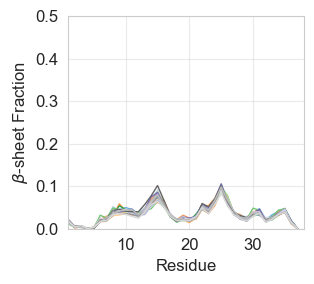

In [32]:
plt.figure(figsize=(3.3,3))

for val in range(20):
    plt.plot(range(0,38),np.array(ss['demux']['sheet'])[val].T[0],
             label='Replica '+str(temperature[val])+' K',linewidth=1,c=plt.cm.tab20c(val))
       
    # plt.errorbar(range(0,38),np.array(ss['demux']['sheet'])[val].T[0],yerr=np.array(ss['demux']['sheet'])[val].T[1],
    #              capsize=5,label='Replica '+str(temperature[val])+' K',linewidth=1,c=plt.cm.tab20c(val))
    
plt.tick_params()
plt.grid(alpha=0.4)
plt.ylim(0,0.5)
plt.xlim(1,38)
# plt.xticks(range(0,38,2),rotation=45)
# plt.title('Beta-sheet Propensities')
plt.ylabel("$\\beta$-sheet Fraction")
plt.xlabel('Residue')
plt.tight_layout()
plt.savefig(out_dir+'ss_fraction_sheet_demux.png',dpi=210)
plt.savefig(out_dir+'ss_fraction_sheet_demux.pdf',dpi=300)

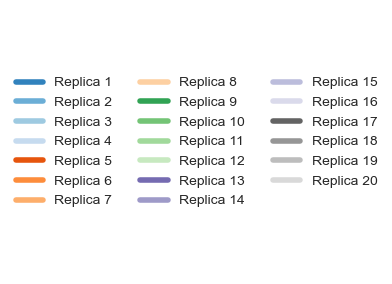

In [33]:
# Create a standalone legend figure
legend_fig = plt.figure(figsize=(3.3,3))
legend_ax = legend_fig.add_subplot(111)
legend_handles = []

# Generate legend items based on colormap
for i in range(20):
    label = "Replica " + str(i+1)
    color = plt.cm.tab20c(i)
    legend_handles.append(plt.Line2D([0], [0], color=color, lw=4, label=label))

# Add the legend
legend_ax.legend(handles=legend_handles, loc="center", frameon=False, ncols=3, fontsize=10)
legend_ax.axis("off")  # Turn off axes for cleaner look
legend_fig.tight_layout()
plt.savefig(out_dir+'ss_fraction_demux_legend.pdf',dpi=300, bbox_inches="tight")

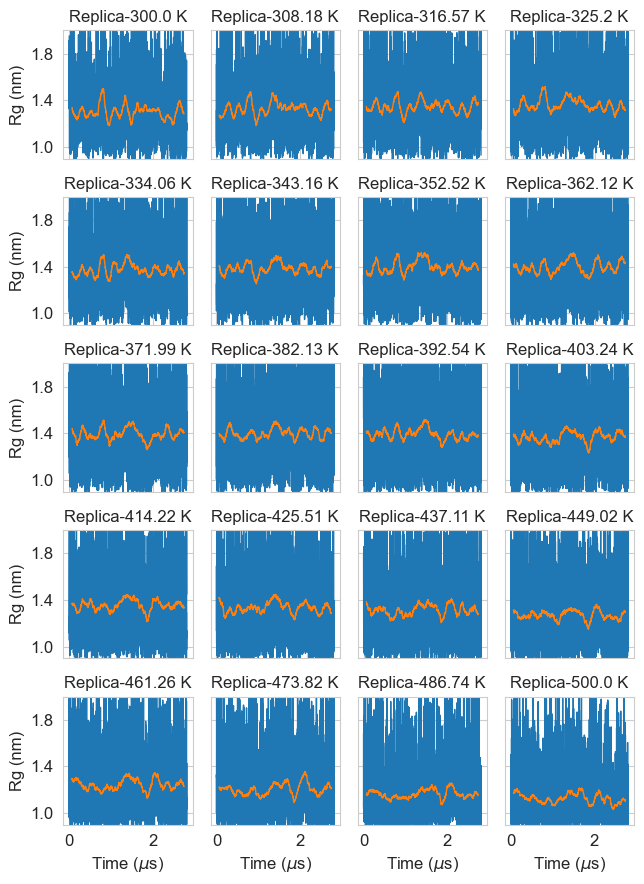

In [34]:
fig, ax = plt.subplots(5, 4, figsize=(6.6, 9), sharex=True, sharey=True)

i='rep'
N=200
time = np.linspace(0, 2.8, 4150)
for val in range(20):
    p, q = np.unravel_index(val,(5, 4))
    
    ax[p,q].plot(time,np.array(rg[i])[val])
    ax[p,q].plot(np.convolve(time, np.ones(N)/N, mode='valid'),
                 np.convolve(np.array(rg[i])[val], np.ones(N)/N, mode='valid'),linewidth=1)
    
    ax[p,q].set_yticks(np.arange(0.6,2.2,0.4))
    ax[p,q].set_ylim(0.9,2.0)
    
    ax[p,q].set_title('Replica-'+str(temperature[val])+' K')

    if not q : ax[p,q].set_ylabel("Rg (nm)")
    if p == 5-1 : ax[p,q].set_xlabel('Time ($\mu$s)')
        
plt.tight_layout()

plt.savefig(out_dir+'rg_rep.png',dpi=210)

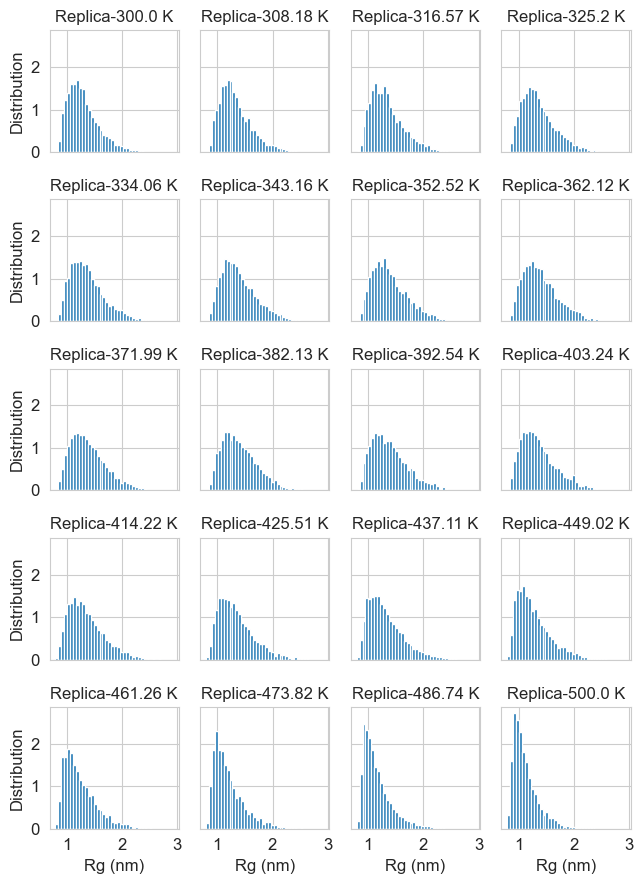

In [35]:
fig, ax = plt.subplots(5, 4, figsize=(6.6, 9), sharey=True, sharex=True)

i='rep'
global_min = np.min([np.min(np.array(rg[i])[val]) for val in range(20)])
global_max = np.max([np.max(np.array(rg[i])[val]) for val in range(20)])
global_range = (global_min, global_max)
bin_width = (global_range[1] - global_range[0]) / 40

for val in range(20):
    p, q = np.unravel_index(val,(5, 4))

    # sns.histplot(np.array(rg[i][val]), bins=40, binrange=global_range, kde=True, ax=ax[p,q])
    
    ax[p,q].hist(np.array(rg[i])[val], bins=40, density=True, range=global_range)
    # counts, bins = np.histogram(np.array(rg[i][val]), bins=40, range=global_range, density=False)
    # bin_width = bins[1] - bins[0]
    # normalized_counts = counts / (np.sum(counts))  # Normalize manually
    
    # ax[p,q].plot((bins[1:] + bins[:-1]) / 2, normalized_counts, color=plt.cm.tab20c(val))
    
    # ax[p,q].set_xlim(0.5, 2.5)
    # ax[p,q].set_ylim(0.0,0.20)
    
    ax[p,q].set_title('Replica-'+str(temperature[val])+' K')

    if not q : ax[p,q].set_ylabel("Distribution")
    if p == 5-1 : ax[p,q].set_xlabel('Rg (nm)')
        
plt.tight_layout()

plt.savefig(out_dir+'rg_hist_rep.png',dpi=210)

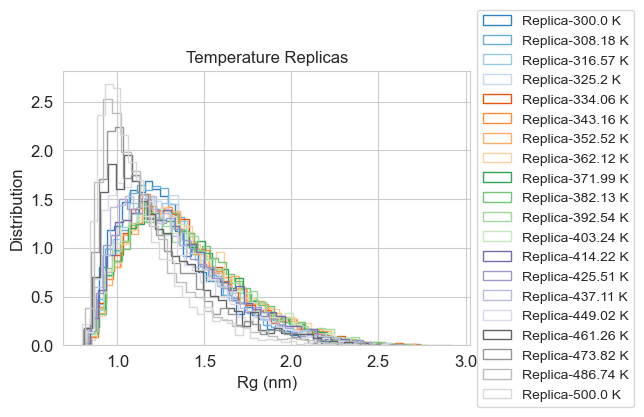

In [36]:
plt.figure(figsize=(6.6,4))

i='rep'

for val in range(20):
    if i=='rep': 
        label_="Replica-"+str(temperature[val])+' K'  
    else:
        label_="Demultiplexed Replica-"+str(val)
    plt.hist(np.array(rg[i])[val],bins=40,density=True,histtype='step',color=plt.cm.tab20c(val),label=label_)
    
    #ax[p,q].set_ylim(1,4)
    #ax[p,q].set_xticks(range(0,142,2))
    #ax[p,q].set_yticks(np.arange(1.0,4.0,0.4))
    
plt.title('Temperature Replicas')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Distribution")
plt.xlabel('Rg (nm)')
        
plt.tight_layout()

plt.savefig(out_dir+'rg_rep_hist_all.png',dpi=210)

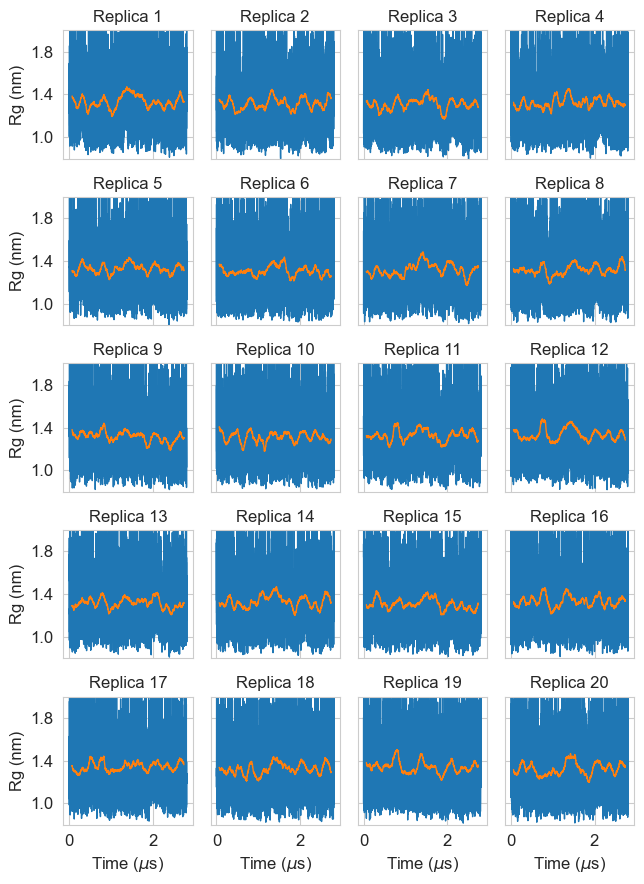

In [37]:
fig, ax = plt.subplots(5, 4, figsize=(6.6, 9), sharex=True, sharey=True)

i='demux'
N=200

for val in range(20):
    p, q = np.unravel_index(val,(5, 4))
    
    ax[p,q].plot(time,np.array(rg[i])[val])
    ax[p,q].plot(np.convolve(time, np.ones(N)/N, mode='valid'),
                 np.convolve(np.array(rg[i])[val], np.ones(N)/N, mode='valid'),linewidth=1)
    
    #ax[p,q].set_xticks(range(0,142,2))
    ax[p,q].set_yticks(np.arange(0.6,2.2,0.4))
    ax[p,q].set_ylim(0.8,2.0)

    ax[p,q].set_title('Replica '+str(val + 1))

    if not q : ax[p,q].set_ylabel("Rg (nm)")
    if p == 5-1 : ax[p,q].set_xlabel('Time ($\mu$s)')
        
plt.tight_layout()

plt.savefig(out_dir+'rg_demux.png',dpi=210)

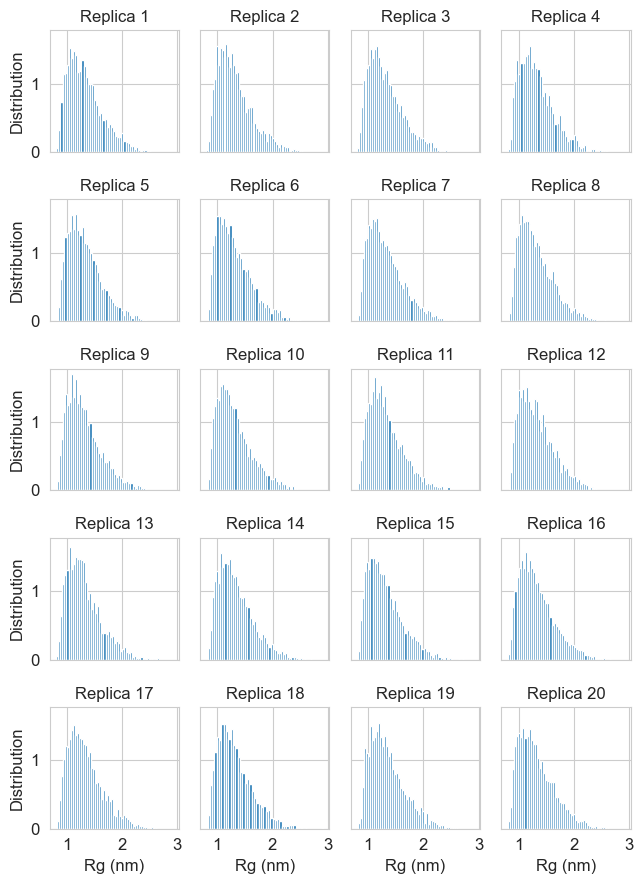

In [38]:
fig, ax = plt.subplots(5, 4, figsize=(6.6, 9), sharex=True, sharey=True)

i='demux'
N=200

for val in range(20):
    p, q = np.unravel_index(val,(5, 4))
    
    ax[p,q].hist(np.array(rg[i])[val], bins=50, density=True)    
    ax[p,q].set_title('Replica '+str(val + 1))

    if not q : ax[p,q].set_ylabel("Distribution")
    if p == 5-1 : ax[p,q].set_xlabel('Rg (nm)')
        
plt.tight_layout()

plt.savefig(out_dir+'rg_hist_demux.png',dpi=210)

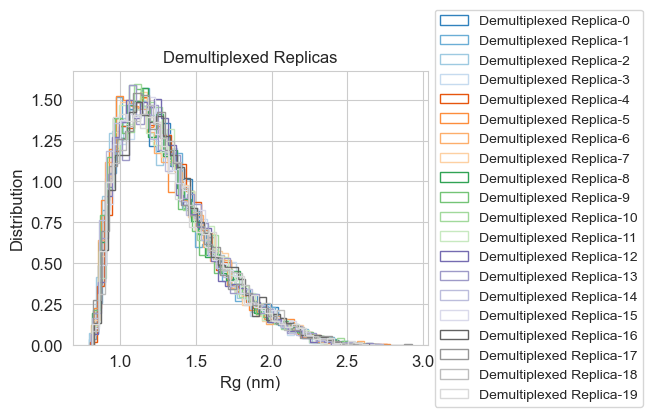

In [39]:
plt.figure(figsize=(6.6,4))

i='demux'

for val in range(20):
    
    if i=='rep': 
        label_="Replica-"+str(temperature[val])+' K'  
    else:
        label_="Demultiplexed Replica-"+str(val)
    
    plt.hist(np.array(rg[i][val]),bins=40,density=True,histtype='step',color=plt.cm.tab20c(val),label=label_)
    
    #ax[p,q].set_ylim(1,4)
    #ax[p,q].set_xticks(range(0,142,2))
    #ax[p,q].set_yticks(np.arange(1.0,4.0,0.4))
    
plt.title('Demultiplexed Replicas')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Distribution")
plt.xlabel('Rg (nm)')
        
plt.tight_layout()

plt.savefig(out_dir+'rg_demux_hist_all.png',dpi=210)

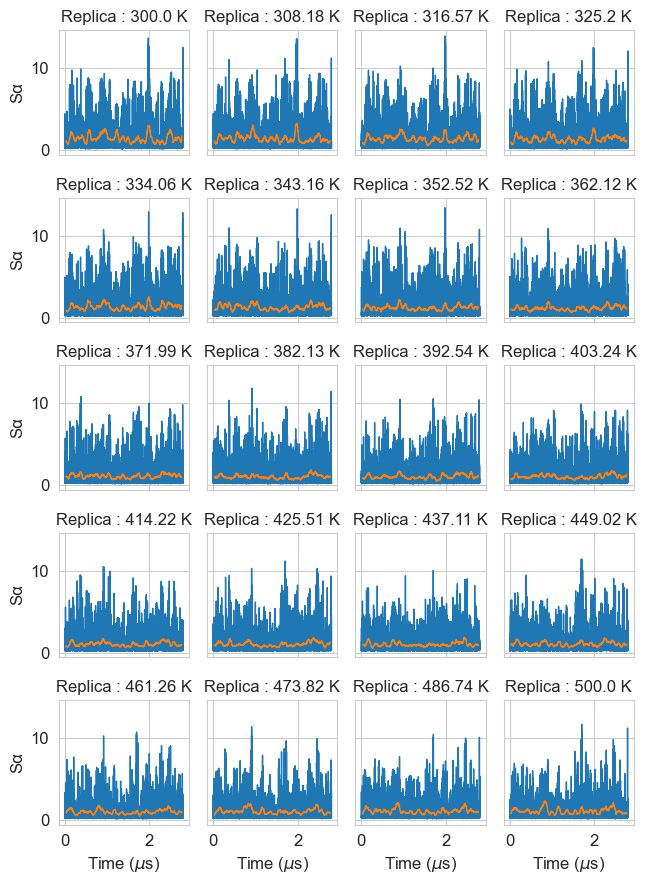

In [40]:
fig, ax = plt.subplots(5, 4, figsize=(6.6, 9), sharex=True, sharey=True)

i='rep'
N=100

for val in range(20):
    p, q = np.unravel_index(val,(5, 4))
    
    X=np.sum(np.array(sa[i])[val],axis=0)
    
    ax[p,q].plot(time,X)
    ax[p,q].plot(np.convolve(time, np.ones(N)/N, mode='valid'),
                 np.convolve(X, np.ones(N)/N, mode='valid'),linewidth=1)
    
    #ax[p,q].set_ylim(0.6,2.0)
    #ax[p,q].set_xticks(range(0,142,2))
    #ax[p,q].set_yticks(np.arange(0.6,2.2,0.4))
    
    ax[p,q].set_title('Replica : '+str(temperature[val])+' K')

    if not q : ax[p,q].set_ylabel("Sα")
    if p == 5-1 : ax[p,q].set_xlabel('Time ($\mu$s)')
        
plt.tight_layout()

plt.savefig(out_dir+'sa_rep.png',dpi=210)

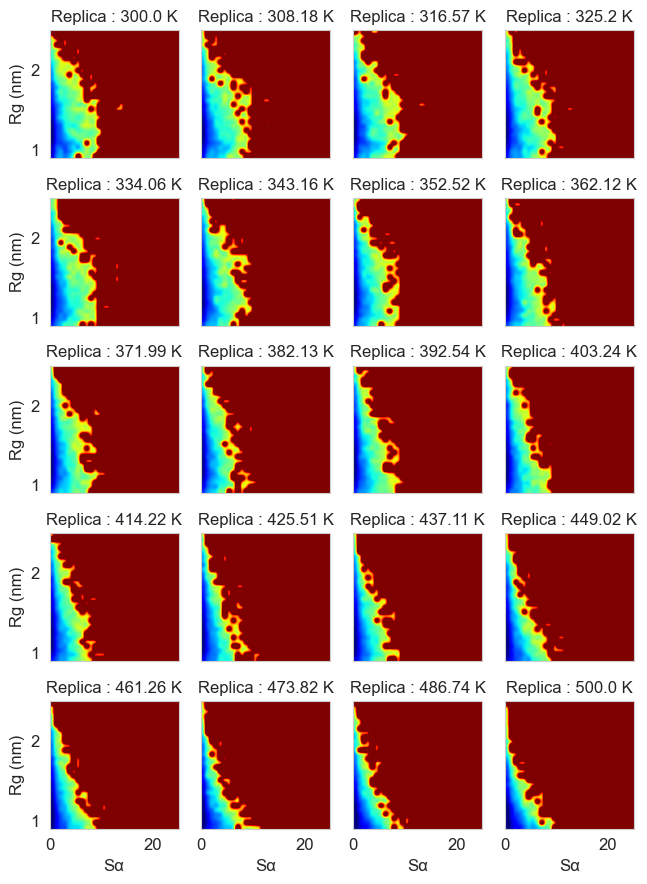

In [41]:
fig, ax = plt.subplots(5, 4, figsize=(6.6, 9), sharex=True, sharey=True)

i='rep'

#cbar_ax = fig.add_axes([.91, .3, .03, .4])

for val in range(20):
    p, q = np.unravel_index(val,(5, 4))
    
    X=np.sum(np.array(sa[i])[val],axis=0)
    
    a, xedges, yedges = np.histogram2d(np.array(rg[i])[val], X, 30, [[0.9, 2.5], [0, 25.0]],
                                       density=True, weights=None)
    
    a = np.log(np.flipud(a)+.000001)
    T = 300
    a = -(0.001987*T)*a
    

    im=subplot_imshow(a, xedges, yedges, ax=ax[p,q])
    
    
    cbar_ticks = [0, 1, 2, 3, 4, 5]
    #cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),aspect=10,cax=cbar_ax,ax=ax[p,q])
    
    #subplot_imshow(a, xedges, yedges,ax=ax[p,q],cbar_ax=cbar_ax,cbar=cb)
    
    imaxes = plt.gca()
    
    ax[p,q].grid()    
    ax[p,q].set_title('Replica : '+str(temperature[val])+' K')

    if not q : ax[p,q].set_ylabel('Rg (nm)')
    if p == 5-1 : ax[p,q].set_xlabel("Sα")
        
plt.tight_layout()

plt.savefig(out_dir+'sa_rg_rep.png',dpi=210)
#plt.show()

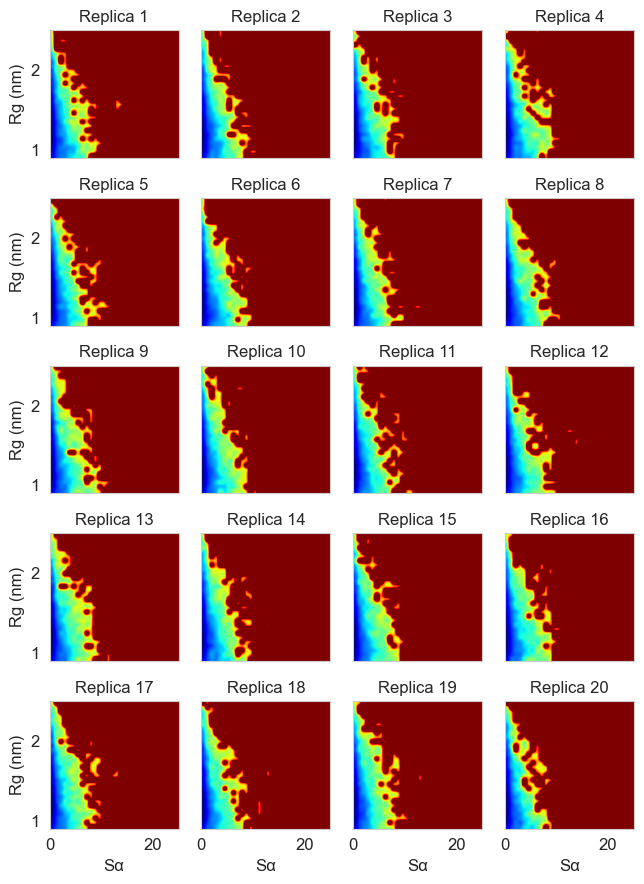

In [42]:
fig, ax = plt.subplots(5, 4, figsize=(6.6, 9), sharex=True, sharey=True)

i='demux'

#cbar_ax = fig.add_axes([.91, .3, .03, .4])

for val in range(20):
    p, q = np.unravel_index(val,(5, 4))
    
    X=np.sum(np.array(sa[i])[val],axis=0)
    
    a, xedges, yedges = np.histogram2d(np.array(rg[i])[val], X, 30, [[0.9, 2.5], [0, 25.0]],
                                       density=True, weights=None)
    
    a = np.log(np.flipud(a)+.000001)
    T = 300
    a = -(0.001987*T)*a
    

    im=subplot_imshow(a, xedges, yedges, ax=ax[p,q])
    
    
    cbar_ticks = [0, 1, 2, 3, 4, 5]
    #cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),aspect=10,cax=cbar_ax,ax=ax[p,q])
    
    #subplot_imshow(a, xedges, yedges,ax=ax[p,q],cbar_ax=cbar_ax,cbar=cb)
    
    imaxes = plt.gca()
    
    ax[p,q].grid()
    
    ax[p,q].set_title('Replica ' + str(val + 1))

    if not q : ax[p,q].set_ylabel('Rg (nm)')
    if p == 5-1 : ax[p,q].set_xlabel("Sα")
        
plt.tight_layout()
plt.savefig(out_dir+'sa_rg_rep.png',dpi=180)

In [50]:
# calculate round trip times stack
def calc_round_trip_stack(file, reps = 20 ):
    """
    xvg = the index xvg file with the exchanges at every 80ps
    """
    # unpack the xvg file 
    rep_dict = {} # for counting 
    xvg = np.loadtxt(file ,comments=["@", "#"])[12501:,1:]

    for i in range(reps): 
        rep = xvg[:,i]
        rep_dict[i] = 0 
        stack = []
        for e in rep:
            # reinstantiate list 
            if len(stack) == reps: 
                rep_dict[i] += 0.5
                stack = []
            elif int(e) not in stack: 
                stack.append(int(e))
    
    return rep_dict

In [51]:
rep_dict = calc_round_trip_stack(temp_xvg_file)
# load in the xvg file and create histograms 
temp_xvg = np.loadtxt(temp_xvg_file ,comments=["@", "#"])[12501:,1:]

Text(0, 0.5, 'Roundtrip Count')

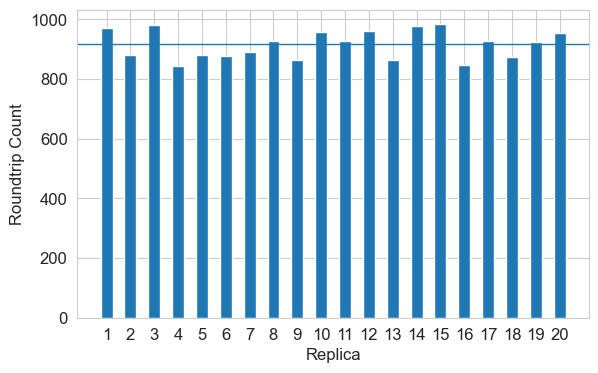

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6.6,4))
heights = [float(i) for i in rep_dict.values()]
plt.bar(rep_dict.keys(), heights, width=0.5)
plt.axhline(np.mean([x for x in rep_dict.values()]))
plt.xticks(np.arange(0,20),labels=np.arange(1,21))
plt.xlabel("Replica")
plt.ylabel("Roundtrip Count")

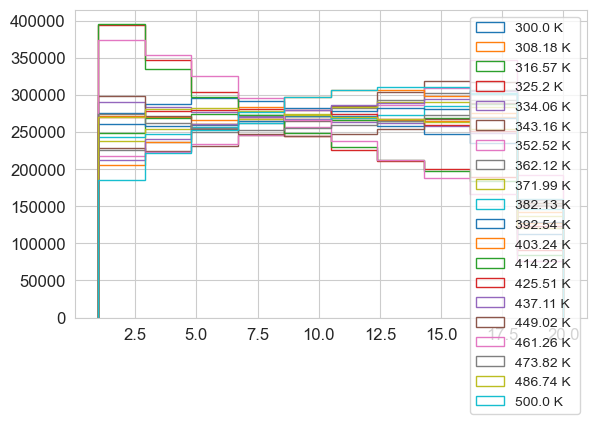

In [53]:
plt.figure(figsize=(6.6,4))
for i in range(20): 
        rep = temp_xvg[:,i]
        plt.hist(rep,range= (1,20),histtype= "step", label= str(temperature[i]) + " K ")

plt.legend(loc = "upper right")

The following is a histogram of demultiplexed replicas 

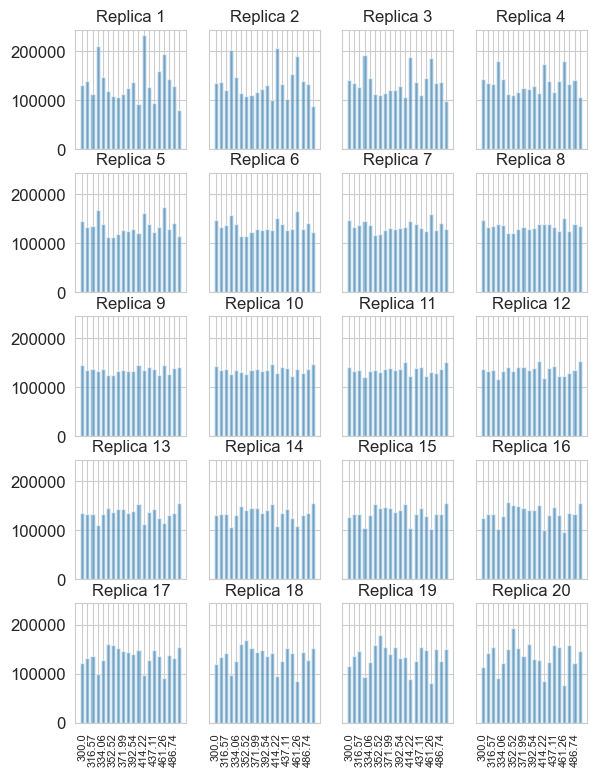

In [54]:
# load in the xvg file and create barplot of the count  
fig, ax = plt.subplots(5, 4, figsize=(6.6, 9), sharex=True, sharey=True)
temp_ticks = []
for i, t in enumerate(temperature):
        if i%2==0: 
                temp_ticks.append(t)
        else:
                temp_ticks.append("")

total = []
for i in range(20):
        ls = [] 
        rep = temp_xvg[:,i]
        for j in range(20):
                count = np.sum(np.where(rep == j, 1, 0))
                ls.append(count)
        total.append(ls)
total = np.array(total)
for k in range(20): 
        p, q = np.unravel_index(k,(5, 4))
        ax[p, q].bar( np.arange(1,21) ,height = total[:,k], label= str(k), alpha = 0.5)
        ax[p,q].set_title('Replica ' + str(k+1))
        ax[p,q].set_xticks(range(1,21), temp_ticks, rotation=90, fontsize=8)

plt.show()

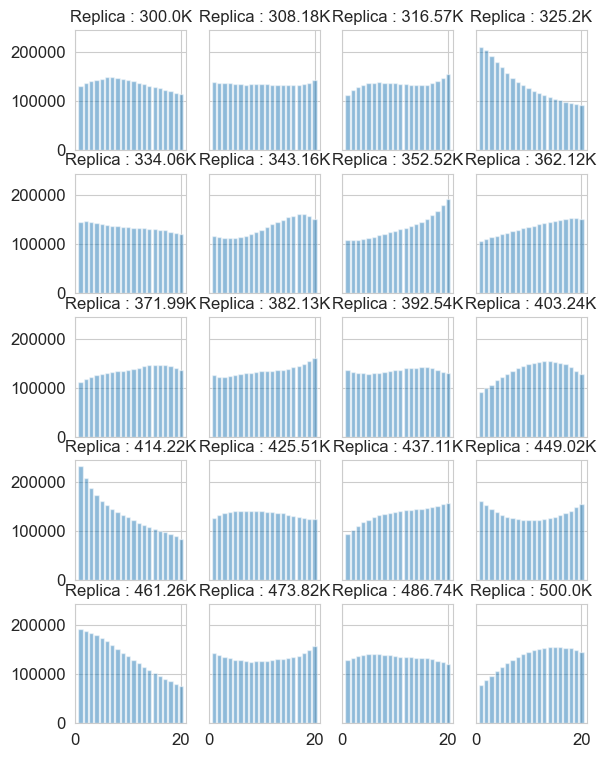

In [55]:
# load in the xvg file and create barplot of the count  
indx_xvg = np.loadtxt(indx_xvg_file ,comments=["@", "#"])[12501:,1:]

fig, ax = plt.subplots(5, 4, figsize=(6.6, 9), sharex=True, sharey=True)

total = []
for i in range(20):
        ls = [] 
        rep = indx_xvg[:,i]
        for j in range(20):
                count = np.sum(np.where(rep == j, 1, 0))
                ls.append(count)
        total.append(ls)
total = np.array(total)
for k in range(20): 
        p, q = np.unravel_index(k,(5, 4))
        ax[p, q].bar( np.arange(1,21) ,height = total[:,k], label= str(k), alpha = 0.5)
        ax[p,q].set_title('Replica : ' + str(temperature[k]) + "K")
        ax[p,q].set_xlim(0,21)

plt.show()

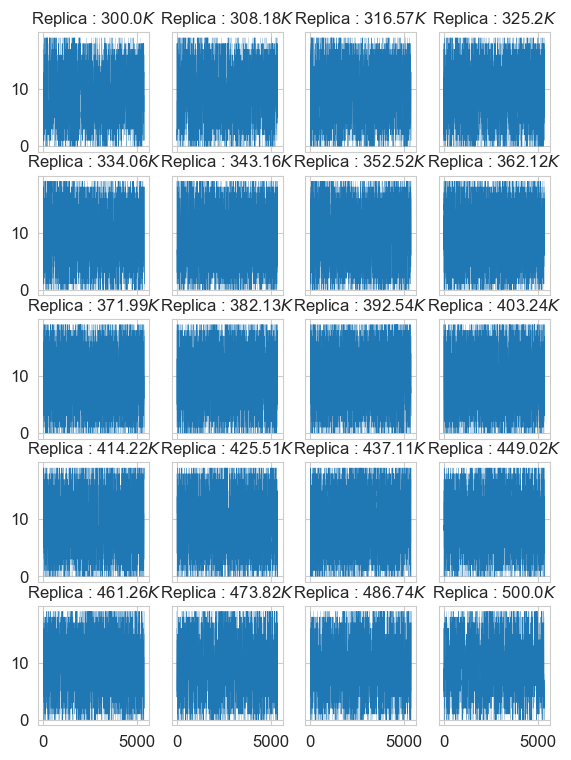

In [56]:
# 
fig, ax = plt.subplots(5, 4, figsize=(6.6, 9), sharex=True, sharey=True)

for val in range(20):
        p, q = np.unravel_index(val,(5, 4))
        rep = indx_xvg[:,val]
        ax[p, q].plot(rep[::500], label= str(temperature[i]) + " K ", lw=0.1)
        a='Replica : '+str(temperature[val])+'$K$'
        ax[p,q].set_title(a)